In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

489


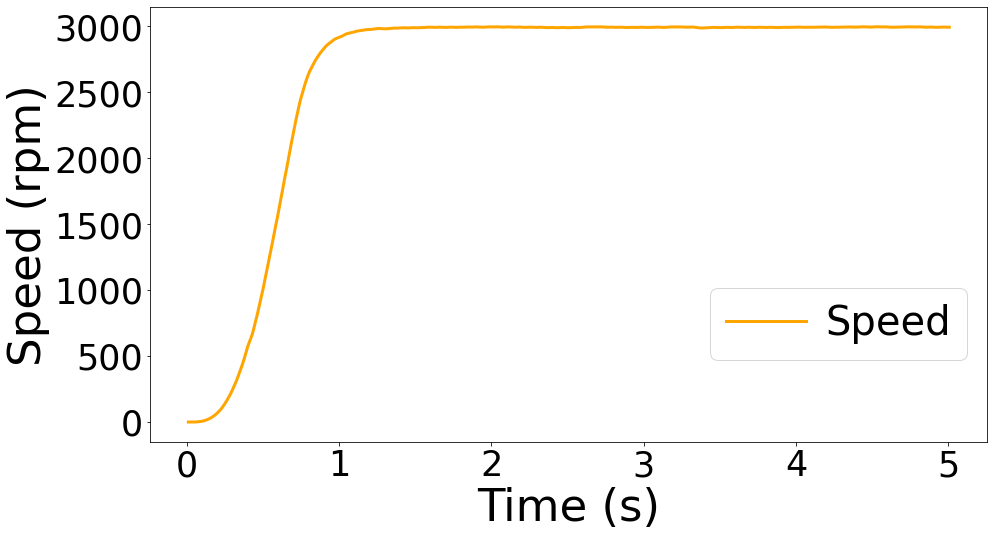

In [15]:
base_dir = "../logs/current_log/"
log_file = "motor_001.csv"

df = pd.read_csv(os.path.join(base_dir,log_file))

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKER_SIZE = 11
LINE_WIDTH = 3

TARGET_SPEED = 3000


fig, axes = plt.subplots(1, 1, figsize=(15, 8))

x = list(range(1,17))

PORTION = int(len(df["time"].values)*1)
print(PORTION)



# 折线图
axes.plot(df["time"].values[0:PORTION], df["speed"].values[0:PORTION], color='orange', label="Speed",  linewidth=LINE_WIDTH)
# axes.plot(df["time"].values[0:PORTION], ([TARGET_SPEED]*len(df["speed"]))[0:PORTION], color='blue', label="Target Speed", linewidth=LINE_WIDTH, linestyle='-')
# 
plt.legend(loc=1, fontsize=40, bbox_to_anchor = (1,0.4), title_fontsize=25, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Time (s)",fontsize=45)
plt.ylabel("Speed (rpm)",fontsize=45)

#设置坐标刻度字体大小
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# plt.title(f"speed")
plt.savefig(f"./diff/13.png",bbox_inches = 'tight')
plt.show()

In [4]:
import math
import scipy
import random

random.randrange(1,4)

# plt.subplot(121)
# hist, bin_edges = np.histogram([1,1,1,2,2,2,3,3], bins=10)
# cum = np.cumsum(hist)
# cdf = cum / cum[-1]

# plt.plot(bin_edges[:-1], cdf)
# np.mean([1,2,3])
min([1,2])

1

[6254 1866 1709 1860 2412 2203 2013 1947 1902 1879]
[  331    77    56    48    47    43    42    45  7408 16038]
[87.6        88.83996777 90.07993555 91.31990332 92.55987109 93.79983887
 95.03980664 96.27977441 97.51974219 98.75970996 99.99967773]
[5.21284167e-05 1.00000147e+01 1.99999772e+01 2.99999398e+01
 3.99999024e+01 4.99998649e+01 5.99998275e+01 6.99997901e+01
 7.99997526e+01 8.99997152e+01 9.99996777e+01]
[0.26009565 0.33770015 0.40877521 0.48613017 0.58644209 0.67806197
 0.76178    0.84275317 0.92185486 1.        ]
[0.01371452 0.01690491 0.01922519 0.021214   0.02316138 0.02494303
 0.02668324 0.02854775 0.33548788 1.        ]


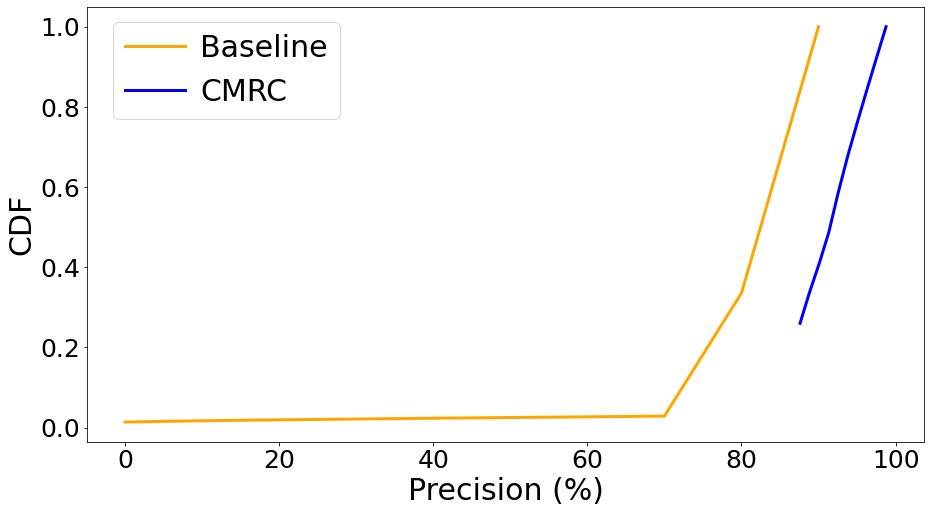

In [25]:

def limit(num, max_val, min_val):
    if(num>=max_val):
        return max_val
    elif(num<=min_val):
        return min_val
    else:
        return num

base_dir = "../logs/current_log/"
baseline_log = "motor_001.csv"
cmrc_log = "motor_001.csv"
# cmrc_log = "motor_001.csv"

df = {}


df["baseline"] = pd.read_csv(os.path.join(base_dir,baseline_log))
df["cmrc"] = pd.read_csv(os.path.join(base_dir,cmrc_log))

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKER_SIZE = 11
LINE_WIDTH = 3

TARGET_SPEED = 3000

speeds = {}
precisions = {}
hist = {}
bin_edges = {}
cum = {}
cdf = {}

speeds["baseline"] =df["baseline"]["speed"].values
precisions["baseline"] = [(1-(abs(speeds["baseline"][i]-TARGET_SPEED)/TARGET_SPEED))*100 for i in range(10,len(df["baseline"])) ]
hist["baseline"], bin_edges["baseline"] = np.histogram(precisions["baseline"], bins=10)
cum["baseline"] = np.cumsum(hist["baseline"])
cdf["baseline"] = cum["baseline"] / cum["baseline"][-1]

speeds["cmrc"] =df["cmrc"]["speed"].values
precisions["cmrc"] = [limit((1-(abs(speeds["cmrc"][i]-TARGET_SPEED)/TARGET_SPEED))*100, 100, 87.6) for i in range(100,len(df["cmrc"])) ]
hist["cmrc"], bin_edges["cmrc"] = np.histogram(precisions["cmrc"], bins=10)
cum["cmrc"] = np.cumsum(hist["cmrc"])
cdf["cmrc"] = cum["cmrc"] / cum["cmrc"][-1]


print(hist["cmrc"])
print(hist["baseline"])
print(bin_edges["cmrc"])
print(bin_edges["baseline"])
print(cdf["cmrc"])
print(cdf["baseline"])

# print(len(precisions["cmrc"]))
# print(len(precisions["baseline"]))

fig, axes = plt.subplots(1, 1, figsize=(15, 8))

# x = list(range(1,17))

# 折线图
axes.plot(bin_edges["baseline"][:-1], cdf["baseline"], color='orange', label="Baseline",  linewidth=LINE_WIDTH)
axes.plot(bin_edges["cmrc"][:-1], cdf["cmrc"], color='blue', label="CMRC", linewidth=LINE_WIDTH, linestyle='-')
# 
plt.legend(loc=1, fontsize=30, bbox_to_anchor = (0.32,1), title_fontsize=30, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Precision (%)",fontsize=30)
plt.ylabel("CDF",fontsize=30)

#设置坐标刻度字体大小
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plt.title(f"speed")
plt.savefig(f"./cdf_baseline.png",bbox_inches = 'tight')
plt.show()

In [56]:
server_log = "server_log.csv"
df = pd.read_csv(os.path.join(base_dir,server_log))

throughput = df["throughput"].values

avg_throughput = np.mean(throughput)

In [57]:
avg_throughput*100*8/10**3

648.9649484536083